# Linear Regression: The Normal Equation vs. Gradient Descent

**Objective:** Determine the threshold(s) where the normal equation becomes
less efficient than standard gradient descent.

In [1]:
import time
import pandas as pd
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

## Normal Equation

The normal equation can be used to calculate the optimal coefficients using
the least-squares method. To account for the linear term, we can concatenate
$X$ with a ones vector $\mathbf{1} \in \mathbb{R}^{n}$.

$$
\begin{align*}
  \tilde{X} &= \begin{bmatrix}
    \mathbf{1} & X
  \end{bmatrix}
  \\
  Y &= \tilde{X} \beta + \epsilon
  \\
  \hat{\beta} &= (\tilde{X}^T \tilde{X})^{-1} \tilde{X}^T Y
\end{align*}
$$

Where $X \in \mathbb{R}^{n \times d}, Y \in \mathbb{R}^{n \times 1},$
$\beta \in \mathbb{R}^{(d+1) \times 1}$, and $\epsilon$ is a random error term.

Linear regression can typically be performed using this equation; however,
it becomes computationally expensive as the size of the matrix increases.

### Helper Functions

In [2]:
def generate_random_data(n: int, d: int) -> tuple[NDArray, NDArray]:
    '''
    Generates a random dataset `X` and `Y`, where feature matrix `X` has shape
    `(n, d)` and target matrix `Y` has shape `(n, 1)`.

    The data is correlated in the form `y = b0 + b1 x1 + ... + bd xd + e`,
    where `b0, b1, ..., bd` are the linear coefficients and `e` is a random
    error term.

    The values of `x1, x2, ..., xd` are random values from a uniform
    distribution between `0` and `100`.

    The coefficients and error term are also random, drawn from a normal
    distribution with a  mean of `μ = 3` and a standard deviation of `σ = 1`.
    '''
    mu = 3
    sigma = 1

    b = np.random.normal(loc=mu, scale=sigma, size=(d, 1))
    b0 = np.random.normal(loc=mu, scale=sigma)
    e = np.random.normal(mu, sigma, (n, 1))

    X = np.random.random(size=(n, d)) * 100
    Y = np.dot(X, b) + b0 + e
    return X, Y


X, Y = generate_random_data(5, 2)

print('X:', X, sep='\n')
print()
print('Y:', Y, sep='\n')

X:
[[38.47629987 93.40620635]
 [27.33006029 45.76702853]
 [55.27570267 27.07421849]
 [96.2667042  32.97504863]
 [81.47813934  1.69312679]]

Y:
[[514.31357356]
 [294.28636548]
 [349.71218424]
 [552.63210776]
 [374.05498886]]


In [3]:
def normal_equation(X: NDArray, Y: NDArray) -> NDArray:
    '''
    Parameters
    ----------
    X : NDArray
        The input features, shape `(n, d)`.
    Y : NDArray
        The target output, shape `(n, 1)`
    
    Returns
    -------
    beta : NDArray
        The least squares coefficients, shape `(d + 1, 1)`
    '''
    n, d = X.shape
    X = np.hstack([np.ones((n, 1)), X])
    beta = np.linalg.inv(X.T @ X) @ X.T @ Y
    return beta


normal_equation(X, Y)

array([[8.38098642],
       [4.41660831],
       [3.5999832 ]])

### Experiment

In [25]:
def time_normal_equation(n: int, d: int, simulations: int=50) -> float:
    times = []
    for _ in range(simulations):
        X, Y = generate_random_data(n, d)
        start_time = time.perf_counter()
        beta = normal_equation(X, Y)
        duration = time.perf_counter() - start_time
        times.append(duration)
    return sum(times) / simulations

Running tests:   0%|          | 0/1000 [00:00<?, ?it/s]

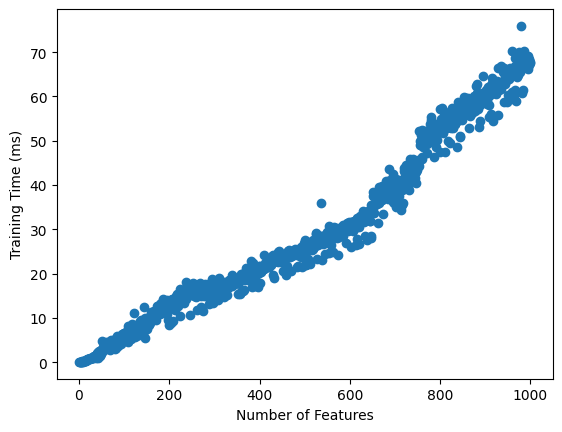

In [26]:
# Parameters
n = 1000
d_max = 1000
d = np.arange(1, d_max + 1)
np.random.shuffle(d)   # Allow more consistent time across simulation
t = np.zeros_like(d, dtype=np.float64)


# Simulations
for i, d_i in tqdm(enumerate(d), desc='Running tests', total=len(d)):
    t_i = time_normal_equation(n, d_i)
    t[i] = t_i


# Plot
plt.scatter(d, t * 1000)
plt.xlabel('Number of Features')
plt.ylabel('Training Time (ms)')
plt.show()

In [27]:
import pandas as pd
df = pd.DataFrame({'d': d, 't': t})
df.insert(0, 'n', n)
df.to_csv('time.csv', index=False)

## Gradient Descent

### Background